# HW3

## Decision Trees

### Team members






### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. Let's check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [767]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Run and check the outputs. 

### Confusion matrix plot

In [768]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


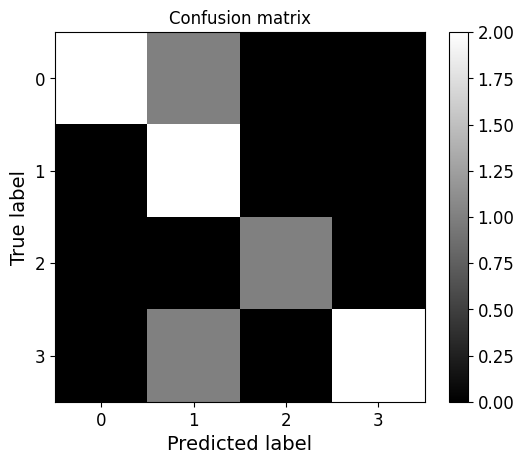

In [769]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 4)

In [770]:
# Print classification report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y_true, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


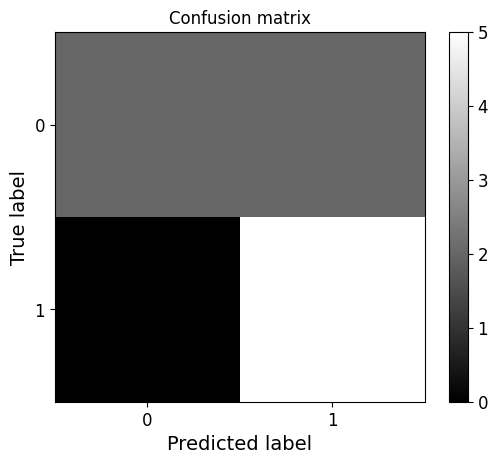

In [771]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]
confusion_mat2 = confusion_matrix(y_true2, y_pred2)

print(confusion_mat2)
plot_confusion_matrix(confusion_mat2, 2)

In [772]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model
#### use pandas  pd.plotting.scatter_matrix

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

C:\Users\priya\AppData\Local\Temp\ipykernel_4776\565035462.py:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)


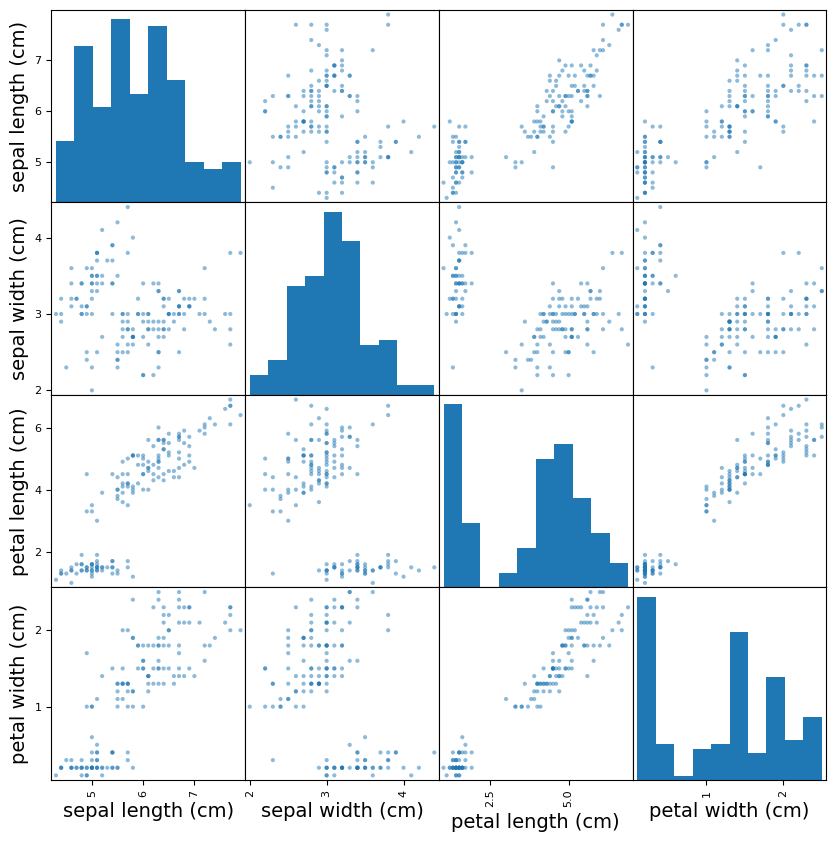

In [773]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('iris.csv')
print(iris.head())
print(iris.tail())
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# Load some data
iris = datasets.load_iris()
print(iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# scatter matrix plot
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

_ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)
_ = ax.set_title('Scatter matrix')
plt.show()



# Decision Trees

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine. 

In [774]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#print(iris)

### Split the data to training and testing 

In [775]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training
### Learing using training data

- use Gini index measure 

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [776]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [777]:
y_pred = tree_clf.predict(X_test)

# Visualization

## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


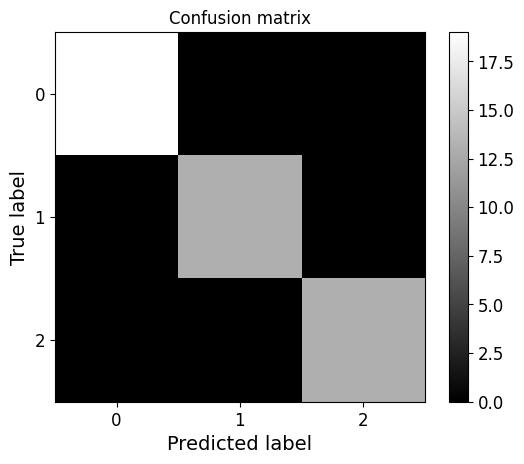

In [778]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

### Model performance summary

In [779]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [780]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree
notice that using graphviz is not the only method to draw decision tree.  You can also use  sklearn.tree.plot_tree

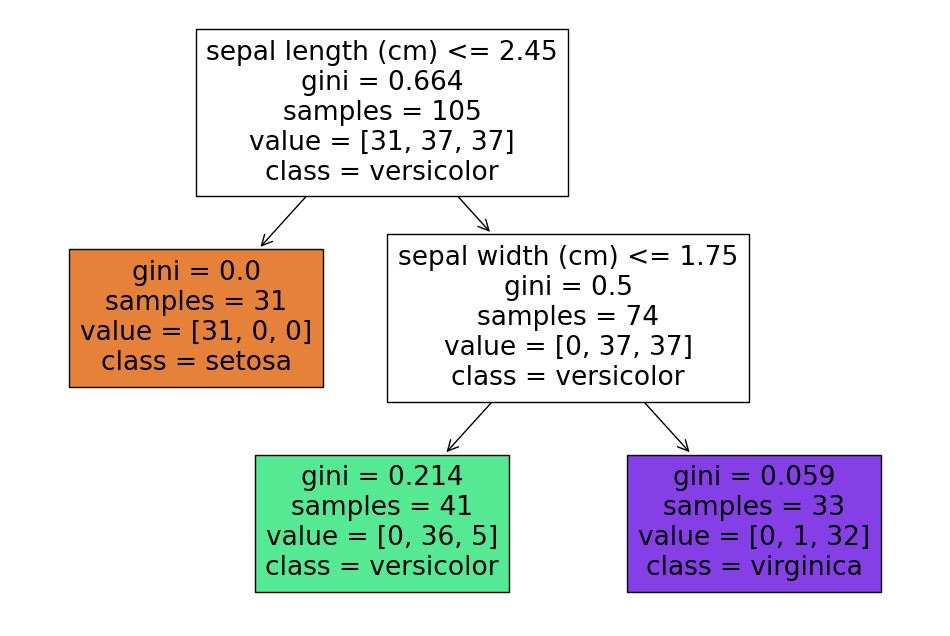

In [781]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit the decision tree classifier
# tree_clf = DecisionTreeClassifier()
# tree_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

## k-Cross Validation

- using sklearn corss_val_score() function

In [782]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=3)

array([0.96, 0.92, 0.92])

## k-Cross Validation

- using KFold function with freedom

In [783]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [784]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.79      0.88        14

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.92        19

    accuracy        

# Decision Tree boundary Visualization

In [785]:
## Example  This function is meant to be used for other data besides iris.  

Saving figure decision_tree_decision_boundaries_plot


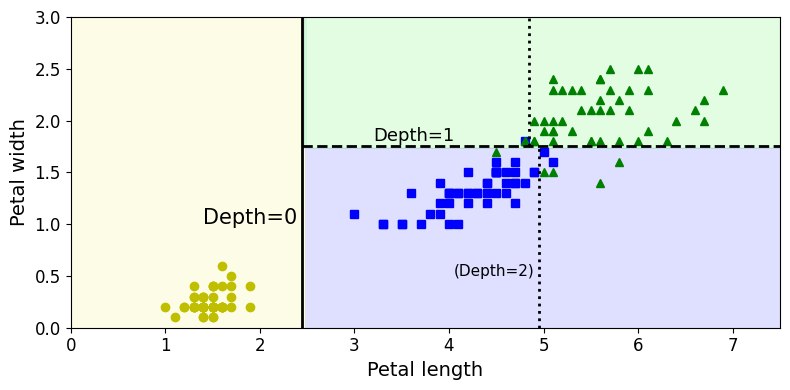

In [786]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [787]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.91428571, 0.08571429]])

In [788]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [789]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower


array([[4.8, 1.8]])

In [790]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


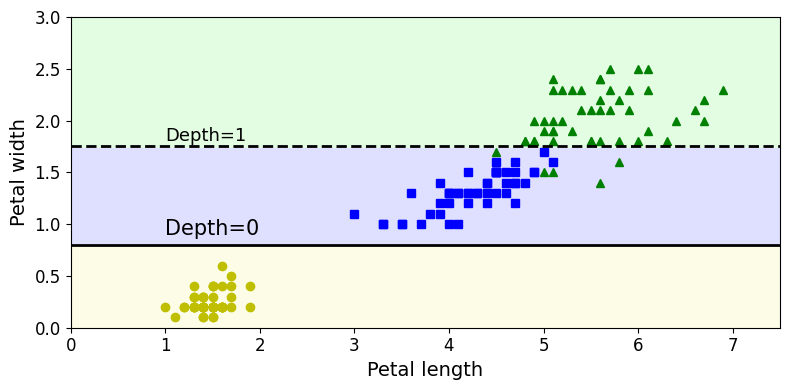

In [791]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# =========  HW3 =============

##  ===============================

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

Importing some modules

1.Import the data, classifier, and metrics libraries similar to what we did above


2.load iris dataset and confirm data has been loaded by printing first few lines

In [792]:
# Import the data, classifier, and metrics libraries similar to what we did above

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

C:\Users\priya\AppData\Local\Temp\ipykernel_4776\3077621636.py:24: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)


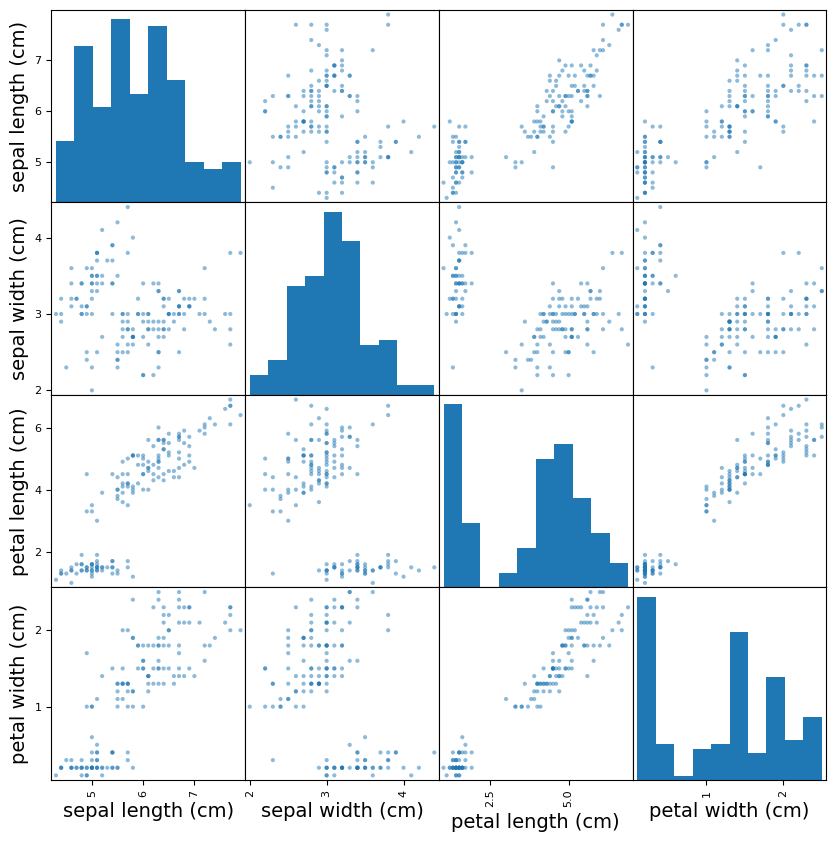

In [793]:
# load iris dataset and confirm data has been loaded by printing first few lines
# Load Iris dataset



import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('iris.csv')
print(iris.head())
print(iris.tail())
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# Load some data
iris = datasets.load_iris()
print(iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# scatter matrix plot
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

_ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)
_ = ax.set_title('Scatter matrix')
plt.show()




Load a Data again instead of reading

In [794]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()


In [795]:
# Split data into testing and training - same as code above
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


## Training
- use entropy index measure 


In [796]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier with the entropy criterion
tree_clf= DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)

# Train the classifier using the training data
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [797]:
y_pred = tree_clf.predict(X_test)

# Visualization
## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


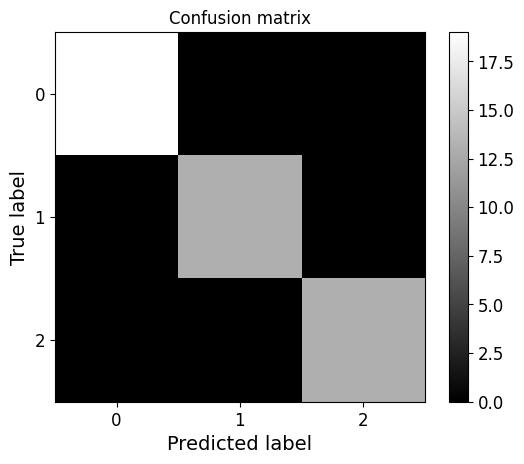

In [798]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

Model Performance Summary

In [799]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [800]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


# Draw a decision tree


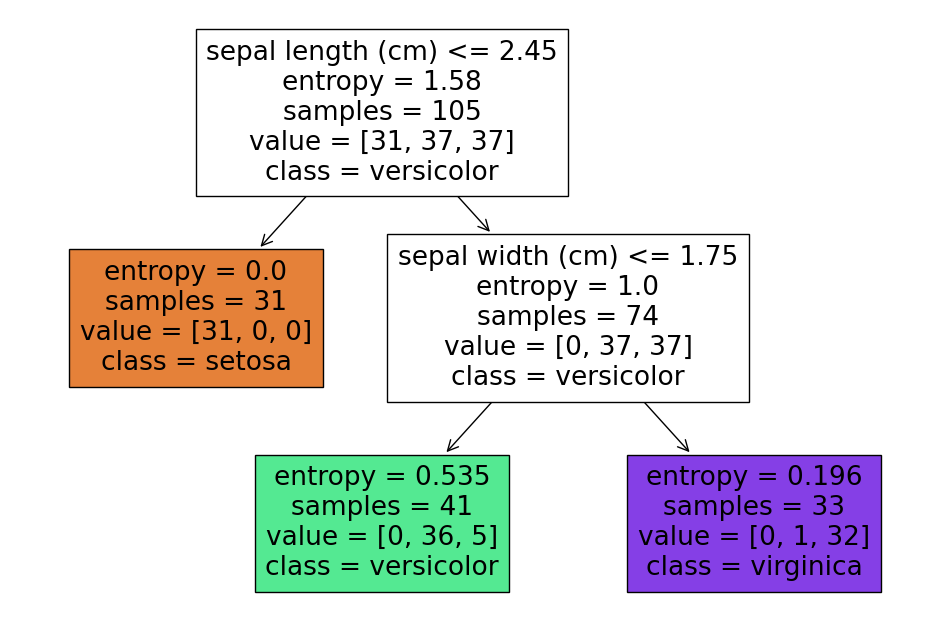

In [801]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

## k-Cross Validation

- using sklearn corss_val_score() function

In [802]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=10)

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.86666667, 1.        , 1.        , 1.        ])

## k-Cross Validation

- using KFold function with freedom

In [803]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=10, random_state=None, shuffle=True)  

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 


KFold(n_splits=10, random_state=None, shuffle=True)


### Applying k-Cross Validation


In [804]:
tree_clf= DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00         2
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.75      0.86         4
   virginica       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.93      0.92      0.92        15
weighted avg       0.95      0.93      0.93        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         5

    accuracy        

# Decision Tree boundary Visualization


Saving figure decision_tree_decision_boundaries_plot


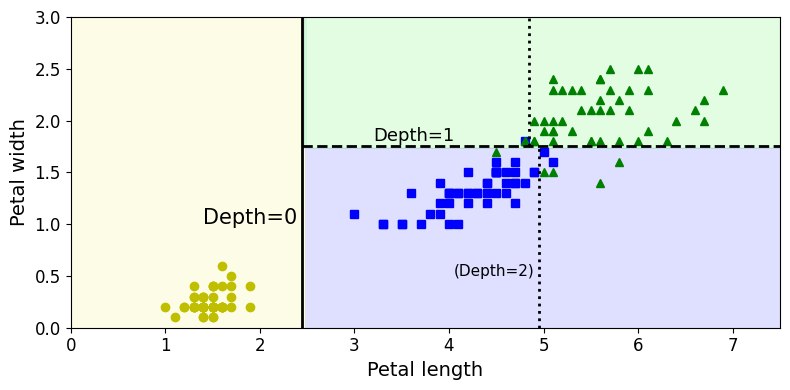

DecisionTreeClassifier(max_depth=2, random_state=42)


In [805]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

print(tree_clf)

# explain what is the relationship between the drawn decision bondries and gini index
Entrophy: The decision boundary is established to optimize information gain. Information gain is referred to as the reduction in entropy once the dataset is divided. This indicates that the decision boundary is designed to create partitions in the feature space where the classes are as distinct as possible, ultimately reducing uncertainty.
In the code, the decision tree classifier (tree_clf) is trained with a specific criterion, which can be entropy. The plot_decision_boundary function is responsible for visualizing the decision boundaries created by the decision tree classifier.
The decision boundaries created using entropy as the criterion aim to maximize information gain at each node, ensuring that the regions in the feature space have the highest possible distinction between classes. This is reflected in how the decision boundaries are drawn, with the algorithm choosing splits based on features that reduce entropy the most, leading to partitions that are as pure as possible.

Gini index: The Gini index is used to minimize impurity within each partition by creating decision boundaries that establish regions where the majority of data points belong to the same class. This results in partitions that are as pure as possible. If the decision tree classifier is trained using the Gini index as a criterion, the resulting decision boundaries will appear differently. Visualizing these decision boundaries using the plot_decision_boundary function highlights the focus on reducing impurity within each region of the feature space. Decision boundaries created using the Gini index prioritize the creation of partitions where the majority of data points belong to the same class, resulting in regions that are as pure as possible according to the Gini index criterion.

Both entropy and the Gini index are measures used by decision tree algorithms to determine the best splits in the data, with each having its own way of guiding the creation of decision boundaries to classify the data effectively.


In [806]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


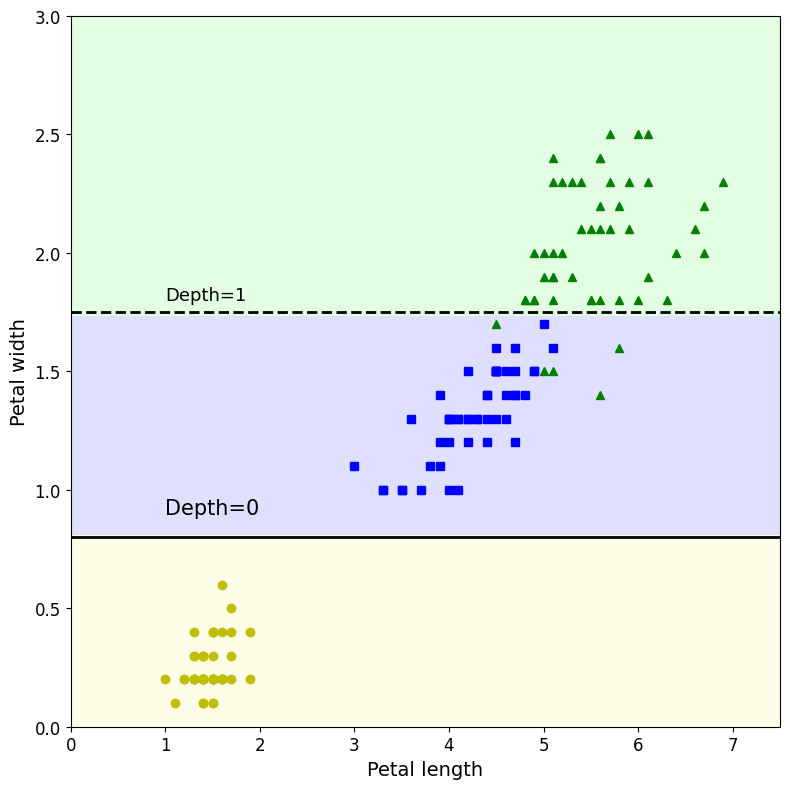

In [807]:
plt.figure(figsize=(8, 8))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

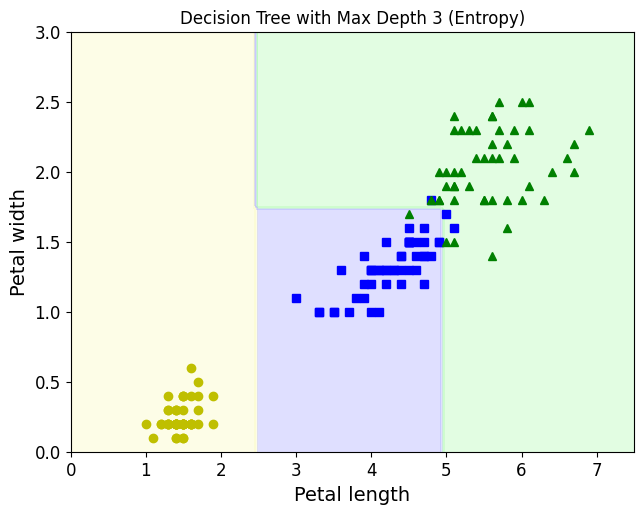

In [808]:
# Change the depth of the decision tree to 3, 4, and  5
plt.figure(figsize=(16, 12))

# Decision tree with depth 3
plt.subplot(221)
tree_clf_depth3 = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
tree_clf_depth3.fit(X, y)
plot_decision_boundary(tree_clf_depth3, X, y)
plt.title("Decision Tree with Max Depth 3 (Entropy)")

plt.show()


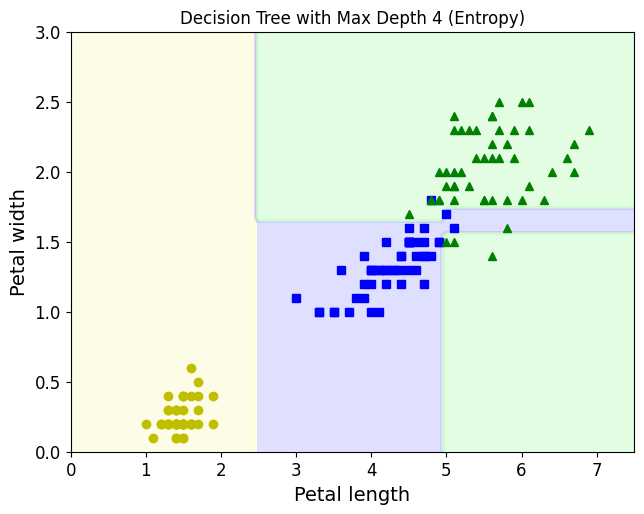

In [809]:
plt.figure(figsize=(16, 12))
# Decision tree with depth 4
plt.subplot(222)
tree_clf_depth4 = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
tree_clf_depth4.fit(X, y)
plot_decision_boundary(tree_clf_depth4, X, y)
plt.title("Decision Tree with Max Depth 4 (Entropy)")
plt.show()


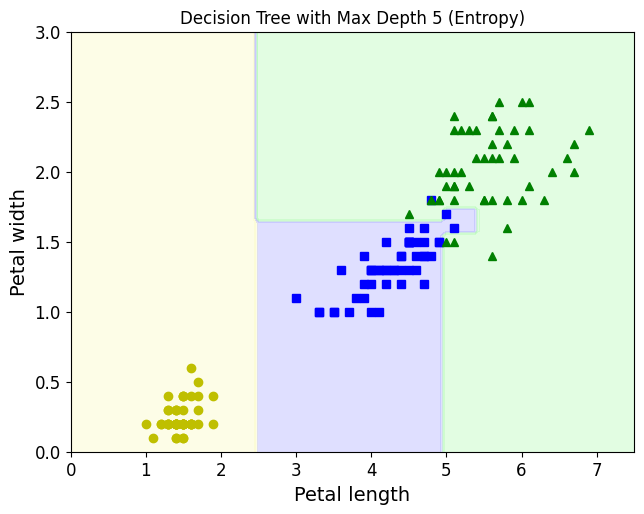

In [810]:
plt.figure(figsize=(16, 12))
# Decision tree with depth 5
plt.subplot(223)
tree_clf_depth5 = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)
tree_clf_depth5.fit(X, y)
plot_decision_boundary(tree_clf_depth5, X, y)
plt.title("Decision Tree with Max Depth 5 (Entropy)")
plt.show()


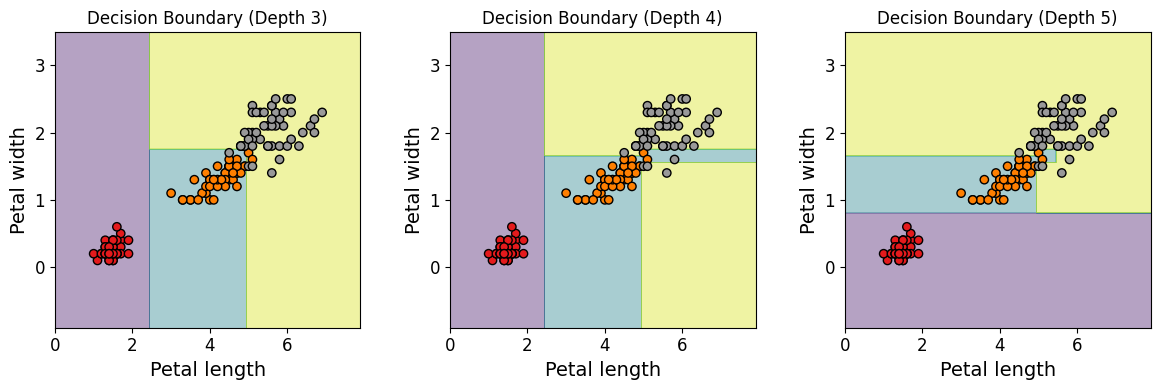

In [811]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # we only take the last two features
y = iris.target

# Train DecisionTreeClassifiers with different depths
depths = [3, 4, 5]
classifiers = []

for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X, y)
    classifiers.append(tree_clf)

# Plot decision boundaries
plt.figure(figsize=(12, 4))

for i, tree_clf in enumerate(classifiers, 1):
    plt.subplot(1, len(classifiers), i)

    # Plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title(f'Decision Boundary (Depth {depths[i-1]})')

plt.tight_layout()
plt.show()


In [812]:
# Change the depth of the decision tree to 3, 4, and 5
tree_clf_3 = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42) 
tree_clf_3.fit(X_train, y_train)
tree_clf_4 = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
tree_clf_4.fit(X_train, y_train)
tree_clf_5 = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)
tree_clf_5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [813]:
# Create the 5 fold Cross-validation
kf_5 = KFold(n_splits=5, random_state=None, shuffle=True)
kf_5.get_n_splits(X)
print(kf_5)
print("-----------------------------------------5 Cross-validation output validation")
# Validate output on the tree with depth 3
for train_index, test_index in kf_5.split(X):
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
 tree_clf_3.fit(X_train, y_train)
 y_pred = tree_clf_3.predict(X_test)
 target_names = iris.target_names
 print(classification_report(y_test, y_pred, target_names=target_names))
print("------------------------------------------------------------------------------")

KFold(n_splits=5, random_state=None, shuffle=True)
-----------------------------------------5 Cross-validation output validation
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.93      0.93      0.93        14
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.86      0.92        14
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15


In [814]:
# Create the 5 fold cv 
# Validate output on the tree with depth 3


# Define the number of folds for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tree_clf_depth3, X, y, cv=k_fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))


Cross-validation scores: [1.         1.         0.93333333 0.9        0.96666667]
Mean CV score: 0.96
Standard deviation of CV scores: 0.038873012632301994


In [815]:
print("-----------------------------------------7 Cross-validation output validation")
# Create the 7 fold Cross-validation
kf_7 = KFold(n_splits=7, random_state=None, shuffle=True)
kf_7.get_n_splits(X)
print(kf_7)
# Validate output on the tree with depth 4
for train_index, test_index in kf_7.split(X):
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
 tree_clf_4.fit(X_train, y_train)
 y_pred = tree_clf_4.predict(X_test)
 target_names = iris.target_names
 print(classification_report(y_test, y_pred, target_names=target_names))
print("------------------------------------------------------------------------------")

-----------------------------------------7 Cross-validation output validation
KFold(n_splits=7, random_state=None, shuffle=True)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.88      0.88      0.88         8
   virginica       0.91      0.91      0.91        11

    accuracy                           0.91        22
   macro avg       0.93      0.93      0.93        22
weighted avg       0.91      0.91      0.91        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12


In [816]:
# Create the 7 fold cv
# Validate output on the tree with depth 4 


# Define the number of folds for cross-validation
k_fold = KFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tree_clf_depth4, X, y, cv=k_fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [1.         1.         1.         0.9047619  0.85714286 0.95238095
 0.9047619 ]
Mean CV score: 0.9455782312925171
Standard deviation of CV scores: 0.05356467941504635


In [817]:
print("-----------------------------------------10 Cross-validation output validation")
# Create the 10 fold Cross-validation
kf_10 = KFold(n_splits=10, random_state=None, shuffle=True)
kf_10.get_n_splits(X)
print(kf_10)
# Validate output on the tree with depth 4
for train_index, test_index in kf_10.split(X):
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
 tree_clf_5.fit(X_train, y_train)
 y_pred = tree_clf_5.predict(X_test)
 target_names = iris.target_names
 print(classification_report(y_test, y_pred, target_names=target_names))
print("-------------------------------------------------------------------------------")

-----------------------------------------10 Cross-validation output validation
KFold(n_splits=10, random_state=None, shuffle=True)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.67      1.00      0.80         4
   virginica       1.00      0.71      0.83         7

    accuracy                           0.87        15
   macro avg       0.89      0.90      0.88        15
weighted avg       0.91      0.87      0.87        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.83      0.91         6
   virginica       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.95      0.93      0.93        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         

In [818]:
# Create the 10 fold cv 
# Validate output on the tree with depth 5


# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tree_clf_depth5, X, y, cv=k_fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))


Cross-validation scores: [1.         1.         1.         1.         0.93333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.93333333]
Mean CV score: 0.9466666666666667
Standard deviation of CV scores: 0.04988876515698587


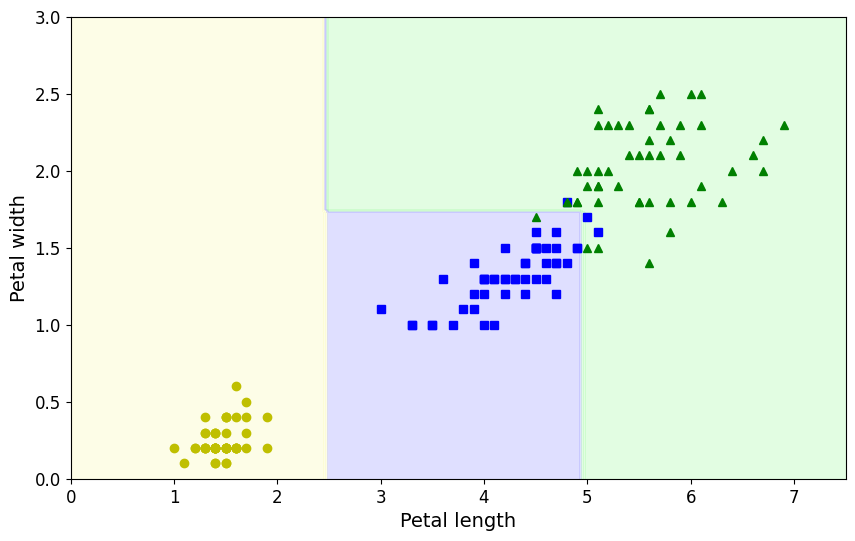

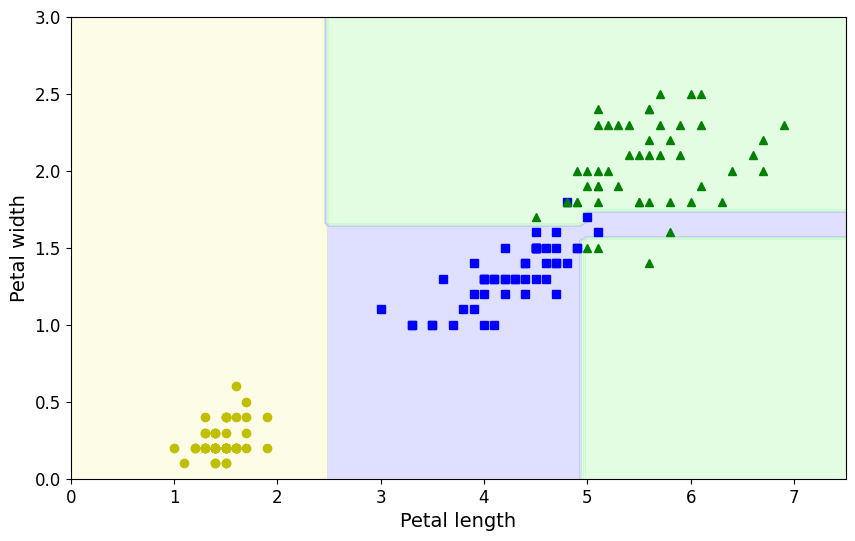

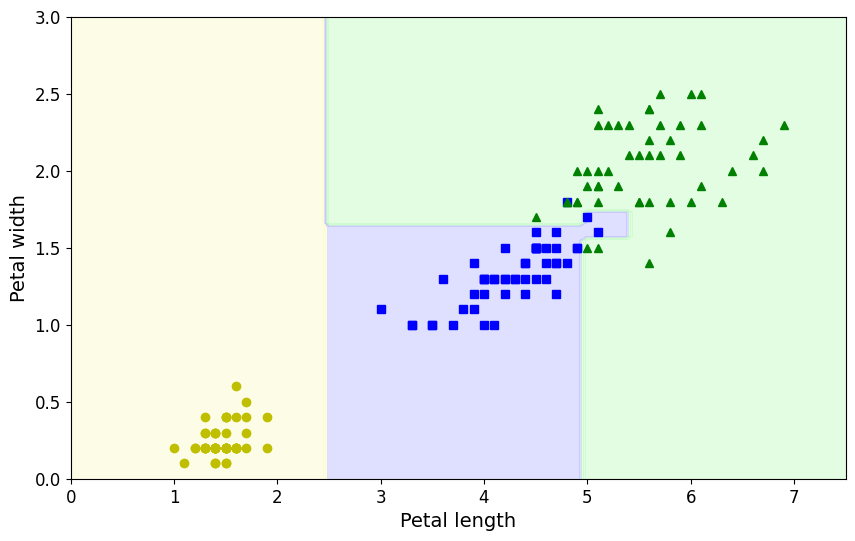

In [819]:
# Show decision boundary graphs for depths 3, 4, and 5
plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf_3, X, y)
plt.show() 
plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf_4, X, y)
plt.show()
plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf_5, X, y)
plt.show()

# explain your conclusions on increasing the depth and increasing the number of folds.


Increasing Depth:

Deeper decision trees have the capacity to capture more intricate patterns in the data, which can be advantageous for complex datasets.
However, with deeper trees, there's a higher risk of overfitting, where the model essentially memorizes the training data instead of learning generalizable patterns.
While deeper trees can lead to more complex decision boundaries that closely fit the training data, they may fail to generalize well to unseen data, potentially diminishing the model's performance.

Increasing Folds:

By increasing the number of folds in techniques like cross-validation, we obtain a more robust estimate of the model's performance.
This increase in folds reduces the variance in the evaluation metric, providing a more reliable assessment of how well the model generalizes to unseen data.
For decision trees trained using entropy or the Gini index, increasing folds enhances the assessment of the model's effectiveness in generalizing to new data, thus providing a more stable measure of performance.
Both explanations highlight crucial aspects of model training and evaluation, emphasizing the trade-offs involved in model complexity and evaluation reliability


# PERFORMING 5,7,10 FOLD CROSS VALIDATION WITH 3,4,7 DEPTH VALUE

In [820]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the decision tree classifiers with different depths
tree_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_depth_7 = DecisionTreeClassifier(max_depth=7, random_state=42)

# Perform 5-fold cross-validation for different depths
scores_5_fold_depth_3 = cross_val_score(tree_depth_3, X, y, cv=5)
scores_5_fold_depth_4 = cross_val_score(tree_depth_4, X, y, cv=5)
scores_5_fold_depth_7 = cross_val_score(tree_depth_7, X, y, cv=5)

# Print 5-fold cross-validation scores for each depth
print("5-fold cross-validation scores for depth 3:", scores_5_fold_depth_3)
print("Mean accuracy for depth 3:", scores_5_fold_depth_3.mean())
print("5-fold cross-validation scores for depth 4:", scores_5_fold_depth_4)
print("Mean accuracy for depth 4:", scores_5_fold_depth_4.mean())
print("5-fold cross-validation scores for depth 7:", scores_5_fold_depth_7)
print("Mean accuracy for depth 7:", scores_5_fold_depth_7.mean())
print("****************************************************************************************")
# Perform 7-fold cross-validation for different depths
scores_7_fold_depth_3 = cross_val_score(tree_depth_3, X, y, cv=7)
scores_7_fold_depth_4 = cross_val_score(tree_depth_4, X, y, cv=7)
scores_7_fold_depth_7 = cross_val_score(tree_depth_7, X, y, cv=7)

# Print 7-fold cross-validation scores for each depth
print("7-fold cross-validation scores for depth 3:", scores_7_fold_depth_3)
print("Mean accuracy for depth 3:", scores_7_fold_depth_3.mean())
print("7-fold cross-validation scores for depth 4:", scores_7_fold_depth_4)
print("Mean accuracy for depth 4:", scores_7_fold_depth_4.mean())
print("7-fold cross-validation scores for depth 7:", scores_7_fold_depth_7)
print("Mean accuracy for depth 7:", scores_7_fold_depth_7.mean())
print("***************************************************************************************")

# Perform 10-fold cross-validation for different depths
scores_10_fold_depth_3 = cross_val_score(tree_depth_3, X, y, cv=10)
scores_10_fold_depth_4 = cross_val_score(tree_depth_4, X, y, cv=10)
scores_10_fold_depth_7 = cross_val_score(tree_depth_7, X, y, cv=10)

# Print 10-fold cross-validation scores for each depth
print("10-fold cross-validation scores for depth 3:", scores_10_fold_depth_3)
print("Mean accuracy for depth 3:", scores_10_fold_depth_3.mean())
print("10-fold cross-validation scores for depth 4:", scores_10_fold_depth_4)
print("Mean accuracy for depth 4:", scores_10_fold_depth_4.mean())
print("10-fold cross-validation scores for depth 7:", scores_10_fold_depth_7)
print("Mean accuracy for depth 7:", scores_10_fold_depth_7.mean())
print("***************************************************************************************")

5-fold cross-validation scores for depth 3: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean accuracy for depth 3: 0.9733333333333334
5-fold cross-validation scores for depth 4: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean accuracy for depth 4: 0.9533333333333334
5-fold cross-validation scores for depth 7: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean accuracy for depth 7: 0.9533333333333334
****************************************************************************************
7-fold cross-validation scores for depth 3: [0.95454545 1.         0.90909091 0.80952381 0.95238095 0.95238095
 1.        ]
Mean accuracy for depth 3: 0.9397031539888684
7-fold cross-validation scores for depth 4: [0.95454545 0.95454545 0.90909091 0.85714286 0.95238095 1.
 1.        ]
Mean accuracy for depth 4: 0.9468150896722325
7-fold cross-validation scores for depth 7: [0.95454545 0.95454545 0.90909091 0.85714286 0.95238095 0.95238095
 1.        ]
Mean accuracy 

# explain your conclusions on increasing the depth and increasing the number of folds. 

Let's analyze the results obtained from the cross-validation scores for different depths and numbers of folds:

1. Increasing Depth:
   - Depth 3: With a depth of 3, the decision tree captures relatively simple patterns in the data. This is evident from the mean accuracy obtained across different folds.
   - Depth 4:Increasing the depth to 4 allows the decision tree to capture more complex patterns. This is reflected in the slightly higher mean accuracy compared to depth 3.
   - Depth 7: Further increasing the depth to 7 results in even higher mean accuracy. However, it's important to note that the increase in accuracy might come at the cost of overfitting, especially if the model is capturing noise in the training data.
   - Overall, as the depth increases, the decision tree becomes more capable of capturing intricate patterns in the data, leading to higher accuracy. However, beyond a certain depth, there's a risk of overfitting, which may not generalize well to unseen data.

2. Increasing Folds:
   - 5 Folds: With 5-fold cross-validation, the mean accuracy scores provide a reliable estimate of the model's performance across different subsets of the data. This helps in obtaining a stable measure of how well the model generalizes to unseen data.
   - 7 Folds: Increasing the number of folds to 7 further enhances the reliability of the mean accuracy scores. With more folds, the evaluation metric becomes less sensitive to the particular train-test split, leading to a more robust assessment of the model's performance.
   - 10 Folds: With 10-fold cross-validation, we obtain an even more refined estimate of the model's performance. The mean accuracy scores are likely to be more stable and reliable compared to fewer folds, providing a better understanding of the model's generalization capability.
   - In summary, increasing the number of folds in cross-validation leads to more reliable estimates of model performance, reducing the variability in the evaluation metric. This helps in obtaining a better understanding of how the model performs on unseen data, irrespective of the specific train-test split.

Reflection:

Completing this assignment offered a profound exploration into the underlying mechanics of decision tree models, particularly their criteria for node splitting. Delving into the concepts of entropy and Gini index shed light on how these metrics shape decision boundaries, elucidating their influence on model performance. However, articulating the nuanced effects of increasing depth and folds presented a delicate balance between complexity and clarity. Striking this balance proved challenging, yet it underscored the paramount importance of clear communication in conveying technical concepts with precision. Ultimately, this assignment not only deepened my understanding of decision tree algorithms but also underscored the vital role of effective communication in the realm of machine learning.